In [ ]:
import os
import math
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
fileTrain = r'C:/Users/secan/Documents/CryptoPriceKaggleCompetition/train.csv'

In [3]:
dataTrain = pd.read_csv(fileTrain) #opens the file in read mode

In [4]:
dataTrain.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
dataTrain['timestamp'] = dataTrain['timestamp'].astype('datetime64[s]')

In [6]:
dataTrain.sort_values(by=['timestamp', 'Asset_ID'])

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
1,2018-01-01 00:01:00,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,2018-01-01 00:01:00,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
0,2018-01-01 00:01:00,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
3,2018-01-01 00:01:00,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
5,2018-01-01 00:01:00,6,173.0,738.302500,746.000000,732.510000,738.507500,3.359879e+02,738.839291,-0.004809
...,...,...,...,...,...,...,...,...,...,...
24236801,2021-09-21 00:00:00,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,2021-09-21 00:00:00,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236805,2021-09-21 00:00:00,11,48.0,232.695000,232.800000,232.240000,232.275000,1.035123e+02,232.569697,NaN
24236804,2021-09-21 00:00:00,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [7]:
dataTrain.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [8]:

Bitcoin = dataTrain[dataTrain['Asset_ID'] == 1]


In [9]:
Bitcoin.head(), Bitcoin.tail()

(             timestamp  Asset_ID  Count       Open     High       Low  \
 2  2018-01-01 00:01:00         1  229.0  13835.194  14013.8  13666.11   
 10 2018-01-01 00:02:00         1  235.0  13835.036  14052.3  13680.00   
 18 2018-01-01 00:03:00         1  528.0  13823.900  14000.4  13601.00   
 26 2018-01-01 00:04:00         1  435.0  13802.512  13999.0  13576.28   
 34 2018-01-01 00:05:00         1  742.0  13766.000  13955.9  13554.44   
 
         Close      Volume          VWAP    Target  
 2   13850.176   31.550062  13827.062093 -0.014643  
 10  13828.102   31.046432  13840.362591 -0.015037  
 18  13801.314   55.061820  13806.068014 -0.010309  
 26  13768.040   38.780529  13783.598101 -0.008999  
 34  13724.914  108.501637  13735.586842 -0.008079  ,
                    timestamp  Asset_ID   Count          Open          High  \
 24236739 2021-09-20 23:56:00         1  1940.0  42983.780000  43001.850849   
 24236753 2021-09-20 23:57:00         1  2026.0  42904.197143  42932.000000  

In [10]:
Bitcoin.isna().sum()

timestamp      0
Asset_ID       0
Count          0
Open           0
High           0
Low            0
Close          0
Volume         0
VWAP           0
Target       304
dtype: int64

In [11]:
Bitcoin['Target'] = Bitcoin['Target'].fillna(method="pad", axis=None)

<ipython-input-11-d95078418508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bitcoin['Target'] = Bitcoin['Target'].fillna(method="pad", axis=None)


In [12]:
Bitcoin.isna().sum()

timestamp    0
Asset_ID     0
Count        0
Open         0
High         0
Low          0
Close        0
Volume       0
VWAP         0
Target       0
dtype: int64

In [13]:
Bitcoin

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
2,2018-01-01 00:01:00,1,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
10,2018-01-01 00:02:00,1,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
18,2018-01-01 00:03:00,1,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
26,2018-01-01 00:04:00,1,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
34,2018-01-01 00:05:00,1,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...,...
24236739,2021-09-20 23:56:00,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,0.002726
24236753,2021-09-20 23:57:00,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,0.002726
24236767,2021-09-20 23:58:00,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,0.002726
24236781,2021-09-20 23:59:00,1,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,0.002726


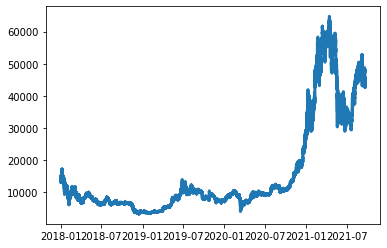

In [14]:
plt.plot(Bitcoin.timestamp, Bitcoin.Close, linewidth=3)

In [15]:
Bitcoin_resampled = df = Bitcoin.set_index('timestamp').resample('D').mean()
Bitcoin_resampled.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
2018-01-01,1,253.826963,13440.394790,13639.086525,13328.674349,13440.450886,40.182793,13439.695699,-0.000119
2018-01-02,1,399.002778,13883.789249,14015.528806,13777.035714,13885.451885,73.278080,13884.647667,0.000947
2018-01-03,1,359.888194,14968.022297,15108.091903,14830.351979,14968.705857,58.219473,14967.995581,-0.000085
2018-01-04,1,393.017361,14820.063520,14956.625431,14685.640812,14820.753062,70.230390,14820.249468,0.000067
2018-01-05,1,413.500000,15826.389955,15948.539135,15739.348365,15828.013939,75.490973,15826.890326,0.000286


In [16]:
import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

Decomposing closing price of BTC over time


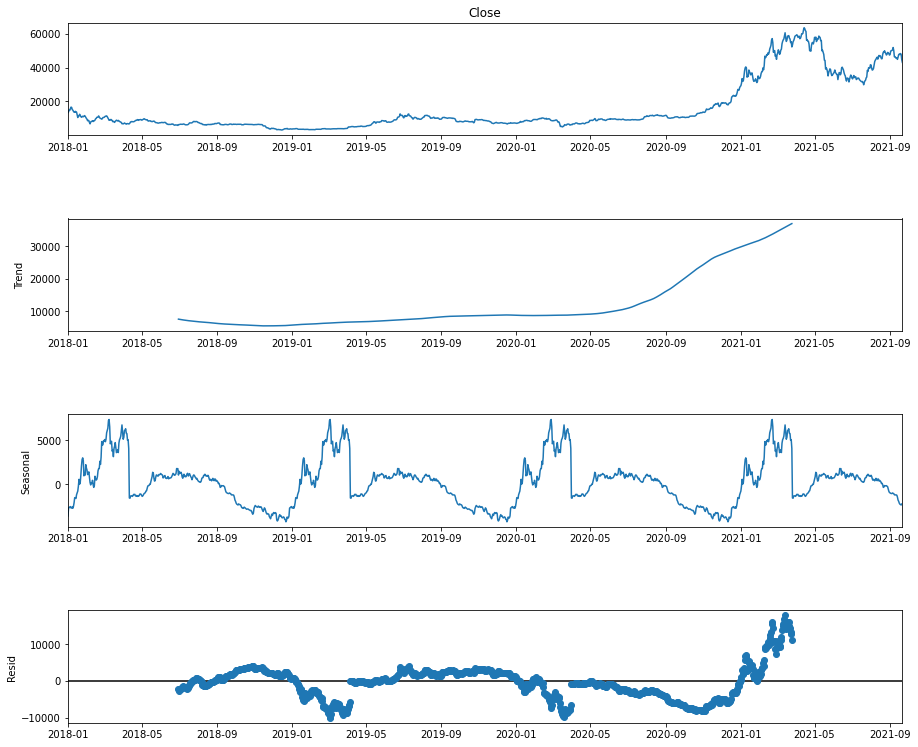

<Figure size 432x288 with 0 Axes>

In [17]:
# Now, for decomposition...
print('Decomposing closing price of BTC over time')
decomposed_btc_close = sm.tsa.seasonal_decompose(Bitcoin_resampled["Close"], model = 'additive',period=360) # The frequncy is annual
figure = decomposed_btc_close.plot()
plt.figure()
figure.set_size_inches(15, 12)
plt.show()

In [18]:
decomposed_btc_close

In [19]:
timestamp_close_df = pd.DataFrame(Bitcoin_resampled['Close'],Bitcoin_resampled.index)

In [20]:
timestamp_close_df

,Close
timestamp,
2018-01-01,13440.450886
2018-01-02,13885.451885
2018-01-03,14968.705857
2018-01-04,14820.753062
2018-01-05,15828.013939
...,...
2021-09-17,47576.980546
2021-09-18,48233.558703
2021-09-19,47726.296578


In [21]:
close_df_train = timestamp_close_df.iloc[:(len(timestamp_close_df)-20)]
close_df_test = timestamp_close_df.iloc[(len(timestamp_close_df)-20):]

In [22]:

from scipy.stats import boxcox

close_df_train.Close, lmbda = boxcox(close_df_train.Close)

In [23]:
close_df_train

,Close
timestamp,
2018-01-01,1.884076
2018-01-02,1.884291
2018-01-03,1.884773
2018-01-04,1.884711
2018-01-05,1.885120
...,...
2021-08-28,1.890312
2021-08-29,1.890296
2021-08-30,1.890256


In [24]:
lmbda

-0.5272299537692212

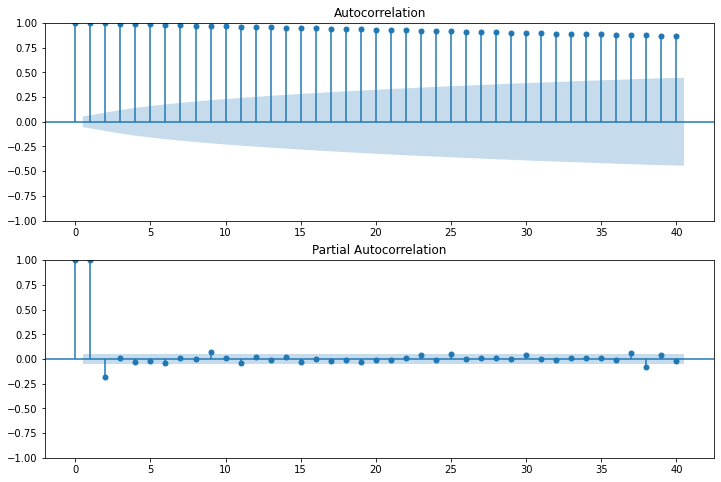

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(close_df_train,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(close_df_train,lags=40,ax=ax2)

In [26]:
result = adfuller(close_df_train.Close.dropna())

print(f" ADF Statistic: {result[0]}")
print(f" p-value: {result[1]}")

 ADF Statistic: -0.6870819536799927
 p-value: 0.850067288482662


In [27]:
difference1 = close_df_train.Close.diff().dropna()
difference1

timestamp
2018-01-02    0.000215
2018-01-03    0.000482
2018-01-04   -0.000063
2018-01-05    0.000409
2018-01-06    0.000311
                ...   
2021-08-28    0.000081
2021-08-29   -0.000016
2021-08-30   -0.000040
2021-08-31   -0.000055
2021-09-01    0.000027
Freq: D, Name: Close, Length: 1339, dtype: float64

Decomposing closing price of BTC over time


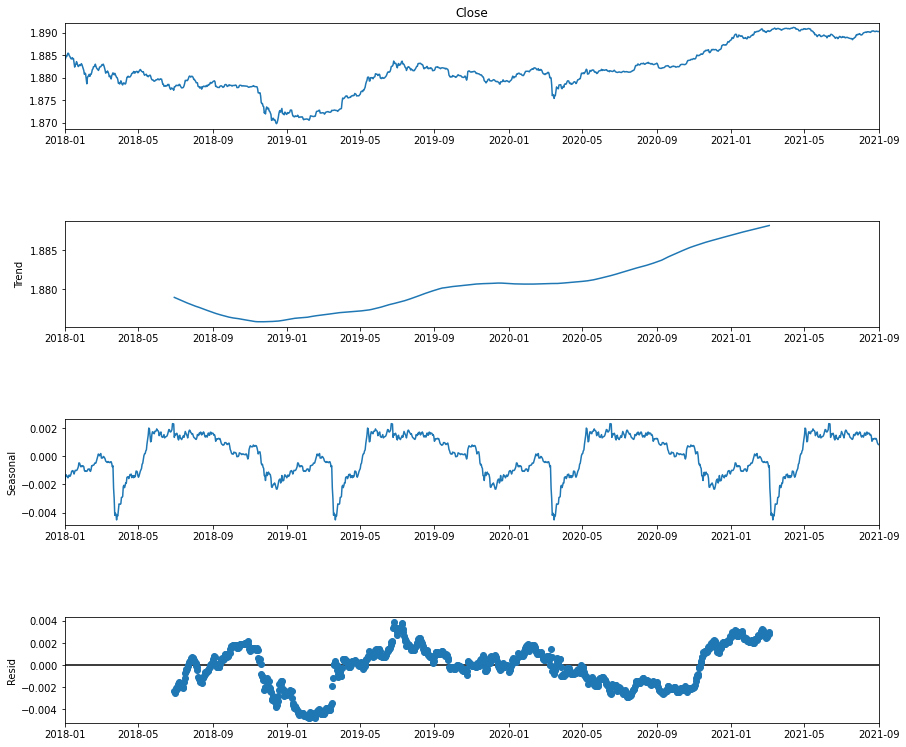

<Figure size 432x288 with 0 Axes>

In [28]:
# Now, for decomposition...
print('Decomposing closing price of BTC over time')
decomposed_btc_close = sm.tsa.seasonal_decompose(close_df_train["Close"], model = 'additive',period=360) # The frequncy is annual
figure = decomposed_btc_close.plot()
plt.figure()
figure.set_size_inches(15, 12)
plt.show()

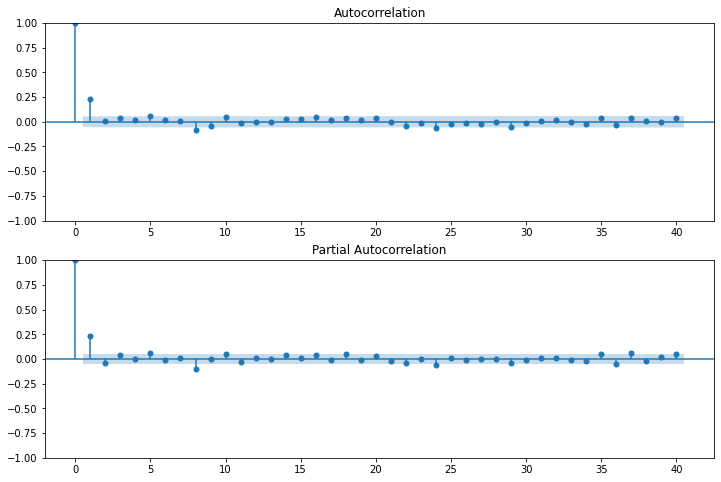

In [29]:
difference1 = close_df_train.Close.diff().dropna()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(difference1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(difference1,lags=40,ax=ax2)

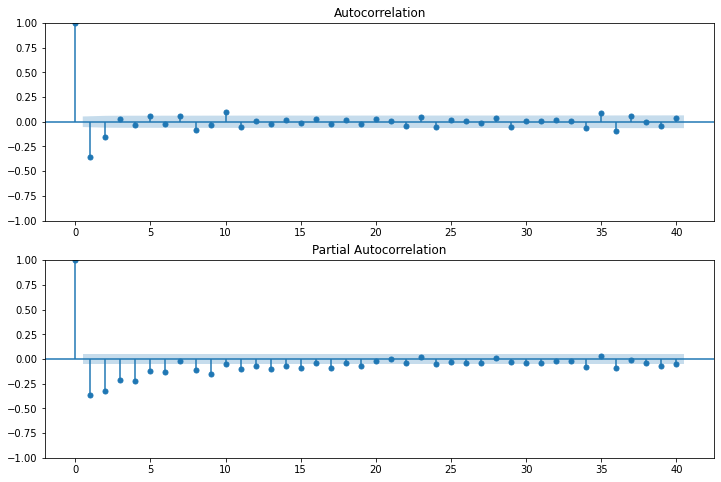

In [30]:
difference2 = close_df_train.Close.diff().diff().dropna()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(difference2,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(difference2,lags=40,ax=ax2)

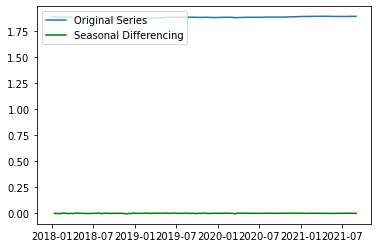

In [31]:
plt.plot(close_df_train['Close'][:], label='Original Series')
plt.plot(close_df_train['Close'].diff(12), label='Seasonal Differencing', color='green')
#plt.set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

Close_vals = close_df_train.Close.to_numpy()
Close_vals = Close_vals.reshape((len(Close_vals), 1))
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaler = scaler.fit(Close_vals)
scaled_Close_vals = scaler.transform(Close_vals)

print(scaled_Close_vals)

[[0.6688511 ]
 [0.67894273]
 [0.70156603]
 ...
 [0.95884871]
 [0.95625064]
 [0.95752532]]


In [33]:
from pmdarima import auto_arima
stepwise_model = auto_arima(Close_vals, start_p=0, start_q=0,
                           max_p=6, max_q=6, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-17778.775, Time=1.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-17123.856, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-17527.457, Time=2.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-17849.452, Time=3.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=nan, Time=1.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-17821.354, Time=2.42 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=4.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-17531.210, Time=2.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-17963.551, Time=2.97 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-17955.988, Time=4.51 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-17778.241, Time=3.77 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-17894.656, Time=1.82 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-17963.099, Time=5.56 sec
 ARIMA(0,1,2)(1,1,2)[12]             : AIC=-17960.618, Time=3.30 sec
 ARIM

In [34]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1340
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                8990.071
Date:                            Mon, 31 Jan 2022   AIC                         -17966.143
Time:                                    14:46:11   BIC                         -17929.808
Sample:                                         0   HQIC                        -17952.524
                                           - 1340                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.444e-07   2.45e-06      0.140      0.888   -4.47e-06    5.16e-06
ma.L1          0.2594      0.016     16.383      0.000       0.228       0.290
ma.L2         -0.0447      0.018     -2.538      0.011      -0.079      -0.010
ar.S.L12      -0.5026      0.011    -44.005      0.000      -0.525      -0.480
ma.S.L12      -0.3031      0.014    -22.165      0.000      -0.330      -0.276
ma.S.L24      -0.4667      0.018    -26.479      0.000      -0.501      -0.432
sigma2      7.508e-08   1.56e-09     48.170      0.000     7.2e-08    7.81e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):              2678.99
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.09e+16. Standard errors may be unstable.
"""

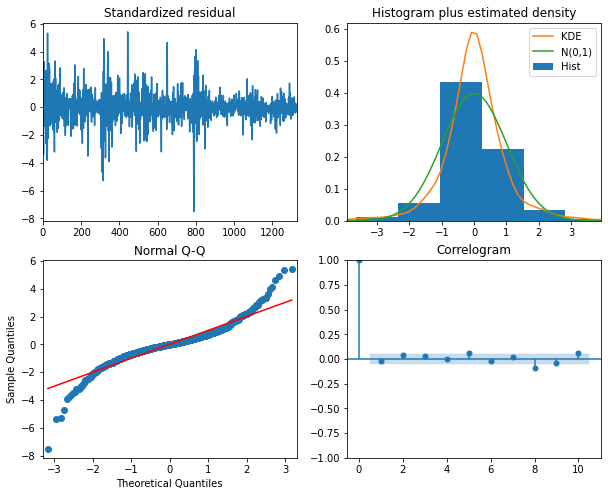

In [35]:
stepwise_model.plot_diagnostics(figsize=(10,8))
plt.show()

In [36]:
sarimax_model=sm.tsa.statespace.SARIMAX(close_df_train,order=(0, 1, 2),seasonal_order=(1,1,2,12))
sarimax_results=sarimax_model.fit()

In [37]:
sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1340
Model:             SARIMAX(0, 1, 2)x(1, 1, 2, 12)   Log Likelihood                8986.309
Date:                            Mon, 31 Jan 2022   AIC                         -17960.618
Time:                                    14:46:16   BIC                         -17929.474
Sample:                                01-01-2018   HQIC                        -17948.945
                                     - 09-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2595      0.016     16.681      0.000       0.229       0.290
ma.L2         -0.0447      0.018     -2.553      0.011      -0.079      -0.010
ar.S.L12      -0.5026      0.011    -45.437      0.000      -0.524      -0.481
ma.S.L12      -0.3031      0.016    -18.829      0.000      -0.335      -0.272
ma.S.L24      -0.4667      0.020    -23.008      0.000      -0.506      -0.427
sigma2      7.409e-08   1.66e-09     44.601      0.000    7.08e-08    7.73e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              2644.00
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+16. Standard errors may be unstable.
"""

In [38]:
close_df_test

,Close
timestamp,
2021-09-02,49653.303422
2021-09-03,49898.891940
2021-09-04,50061.790460
2021-09-05,50344.644727
2021-09-06,51774.259696
2021-09-07,49950.841408
2021-09-08,46289.992210
2021-09-09,46416.534557
2021-09-10,45922.629906


In [39]:
pred = sarimax_results.predict(start = '2021-09-02',end = '2021-09-21')
print(pred)

2021-09-02    1.890280
2021-09-03    1.890286
2021-09-04    1.890290
2021-09-05    1.890308
2021-09-06    1.890279
2021-09-07    1.890284
2021-09-08    1.890272
2021-09-09    1.890310
2021-09-10    1.890306
2021-09-11    1.890298
2021-09-12    1.890320
2021-09-13    1.890338
2021-09-14    1.890374
2021-09-15    1.890386
2021-09-16    1.890388
2021-09-17    1.890403
2021-09-18    1.890377
2021-09-19    1.890396
2021-09-20    1.890384
2021-09-21    1.890420
Freq: D, Name: predicted_mean, dtype: float64


In [40]:
from scipy.special import inv_boxcox

pred = inv_boxcox(pred, -.52722)
pred

2021-09-02    47919.633897
2021-09-03    48014.891596
2021-09-04    48063.848361
2021-09-05    48324.010503
2021-09-06    47908.331870
2021-09-07    47980.584666
2021-09-08    47810.120917
2021-09-09    48355.489474
2021-09-10    48286.326546
2021-09-11    48182.060859
2021-09-12    48488.245621
2021-09-13    48756.589316
2021-09-14    49277.129591
2021-09-15    49454.233116
2021-09-16    49478.513409
2021-09-17    49700.595229
2021-09-18    49319.656342
2021-09-19    49600.946556
2021-09-20    49416.577800
2021-09-21    49956.040117
Freq: D, Name: predicted_mean, dtype: float64

In [45]:
close_df_test['Sarimax Predictions'] = pred
close_df_test

,Close,Sarimax Predictions
timestamp,,
2021-09-02,49653.303422,47919.633897
2021-09-03,49898.891940,48014.891596
2021-09-04,50061.790460,48063.848361
2021-09-05,50344.644727,48324.010503
2021-09-06,51774.259696,47908.331870
2021-09-07,49950.841408,47980.584666
2021-09-08,46289.992210,47810.120917
2021-09-09,46416.534557,48355.489474
2021-09-10,45922.629906,48286.326546


<AxesSubplot:xlabel='timestamp'>

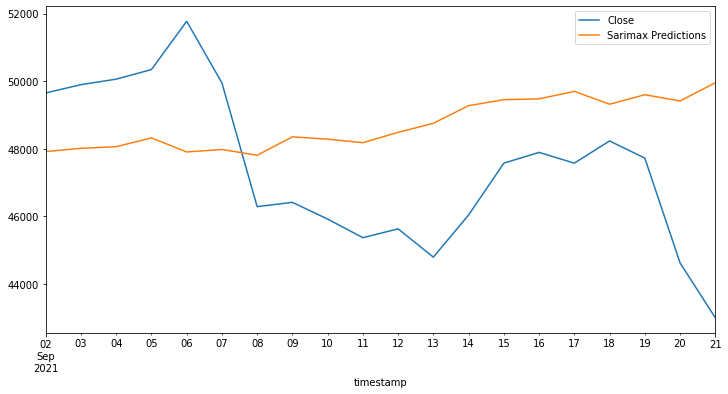

In [42]:
close_df_test.plot(figsize = (12,6))

In [46]:
from sklearn import metrics

print(metrics.mean_squared_error(close_df_test.Close,close_df_test['Sarimax Predictions']))

8691773.67792958


In [43]:
close_df_test = close_df_test.drop(columns = ['Sarimax Predictions'])
close_df_test

,Close
timestamp,
2021-09-02,49653.303422
2021-09-03,49898.891940
2021-09-04,50061.790460
2021-09-05,50344.644727
2021-09-06,51774.259696
2021-09-07,49950.841408
2021-09-08,46289.992210
2021-09-09,46416.534557
2021-09-10,45922.629906


In [44]:
#LSTM Prediction


In [ ]:
close_df_train.Close, lmbda = boxcox(close_df_train.Close)
close_df_train, lmbda

In [ ]:
scaler.fit(close_df_train)
scaled_train = scaler.transform(close_df_train)
scaler_test = scaler.transform(close_df_test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 100
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [ ]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(generator, epochs = 10)

In [ ]:
lossPerEpoch = model.history.history['loss']
plt.plot(range(len(lossPerEpoch)),lossPerEpoch)

In [ ]:
last_train_batch = scaled_train[-100:]
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [ ]:
model.predict(last_train_batch)

In [ ]:
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(scaler_test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,],[[current_pred]], axis = 1)
    

In [ ]:
test_predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

In [ ]:
from scipy.special import inv_boxcox

pred = inv_boxcox(true_predictions, -13.3)
pred

In [ ]:
close_df_test['LSTM Predictions'] = pred

In [ ]:
close_df_test

In [ ]:
close_df_test.plot(figsize = (12,6))

In [ ]:
Binance_Coin.isna().sum()

In [ ]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(Bitcoin.close, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
plt.plot(Binance_Coin.timestamp, Binance_Coin.Close, linewidth=3)

In [ ]:
plt.plot(Bitcoin_Cash.timestamp, Bitcoin_Cash.Target, linewidth=3)

In [ ]:
plt.plot(Cardano.timestamp, Cardano.Target, linewidth=3)

In [ ]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
trainX = []
trainY = []
n_future = 1
n

In [ ]:
history = model.fit

In [ ]:
asset_details = r'C:/Users/secan/Documents/CryptoPriceKaggleCompetition/asset_details.csv'

In [ ]:
data_daily = pd.DataFrame()

for asset_id in asset_details.index:
    data_single = data[data.Asset_ID == asset_id].copy()

    data_single_new = data_single[['timestamp','Count']].resample('D', on='timestamp').sum()
    data_single_new['Open'] = data_single[['timestamp','Open']].resample('D', on='timestamp').first()['Open']
    data_single_new['High'] = data_single[['timestamp','High']].resample('D', on='timestamp').max()['High']
    data_single_new['Low'] = data_single[['timestamp','Low']].resample('D', on='timestamp').min()['Low']
    data_single_new['Close'] = data_single[['timestamp','Close']].resample('D', on='timestamp').last()['Close']
    data_single_new['Volume'] = data_single[['timestamp','Volume']].resample('D', on='timestamp').sum()['Volume']
    data_single_new['Asset_ID'] = asset_id